In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statistics

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score,classification_report,confusion_matrix

In [2]:
data = pd.read_csv('Employee-Attrition.csv')

In [3]:
data.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [4]:
data.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [5]:
data.isnull().any().sum()

0

In [6]:
data.duplicated().any()

False

In [7]:
categories = ['Newbies', 'associate', 'Intermediate', 'professional', 'expert', 'veteran', 'master', 'grandmaster']

def assign_category(age):
    for i, cutoff in enumerate(range(6, 45, 5), 1):
        if age < cutoff:
            return categories[i-1]  # Return the category corresponding to the cutoff

# Create a new column and assign category based on age
data['TotalYearsCategory'] = data['TotalWorkingYears'].apply(assign_category)
data['TotalYearsCategory']

0          associate
1          associate
2          associate
3          associate
4          associate
            ...     
1465    professional
1466       associate
1467       associate
1468    professional
1469       associate
Name: TotalYearsCategory, Length: 1470, dtype: object

In [8]:
categories = ['young', 'youngAdult','Adult','oldAdult','middleAge', 'oldAge','toRetire']

def assign_category(age):
    for i, cutoff in enumerate(range(19, 68, 7), 1):
        if age < cutoff:
            return categories[i-1]  # Return the category corresponding to the cutoff

# Create a new column and assign category based on age
data['AgeCategory'] = data['Age'].apply(assign_category)
data['AgeCategory']

0       middleAge
1          oldAge
2        oldAdult
3        oldAdult
4           Adult
          ...    
1465     oldAdult
1466     oldAdult
1467        Adult
1468       oldAge
1469     oldAdult
Name: AgeCategory, Length: 1470, dtype: object

In [9]:
data['TotalWorkingYears'].head(25)

0      8
1     10
2      7
3      8
4      6
5      8
6     12
7      1
8     10
9     17
10     6
11    10
12     5
13     3
14     6
15    10
16     7
17     1
18    31
19     6
20     5
21    10
22    13
23     0
24     8
Name: TotalWorkingYears, dtype: int64

In [10]:
data['TotalYearsCategory'].head(25)

0        associate
1        associate
2        associate
3        associate
4        associate
5        associate
6     Intermediate
7          Newbies
8        associate
9     professional
10       associate
11       associate
12         Newbies
13         Newbies
14       associate
15       associate
16       associate
17         Newbies
18          master
19       associate
20         Newbies
21       associate
22    Intermediate
23         Newbies
24       associate
Name: TotalYearsCategory, dtype: object

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [12]:
cols = list(data.columns)
categorical_cols = [col for col in cols if data[col].dtype == 'object']
categorical_cols.remove('Over18')

In [13]:
df = data[categorical_cols]

In [14]:
df.nunique()

Attrition             2
BusinessTravel        3
Department            3
EducationField        6
Gender                2
JobRole               9
MaritalStatus         3
OverTime              2
TotalYearsCategory    8
AgeCategory           7
dtype: int64

In [15]:
for col in categorical_cols:
    result = df[col].value_counts()
    print(result)
    print('-----------------')

Attrition
No     1233
Yes     237
Name: count, dtype: int64
-----------------
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64
-----------------
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64
-----------------
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64
-----------------
Gender
Male      882
Female    588
Name: count, dtype: int64
-----------------
JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64
-----------------
MaritalSt

In [16]:
count_1 = data.apply(lambda col: col.name if col.nunique() == 1 else None).dropna().tolist()
count_1

['EmployeeCount', 'Over18', 'StandardHours']

In [17]:
to_drop_columns = ['Age','TotalWorkingYears','MonthlyRate','MonthlyIncome','DailyRate','EmployeeNumber']
to_drop_columns.extend(count_1)
data.drop(axis = 1,columns = to_drop_columns,inplace = True)

In [18]:
data.shape

(1470, 28)

<Axes: >

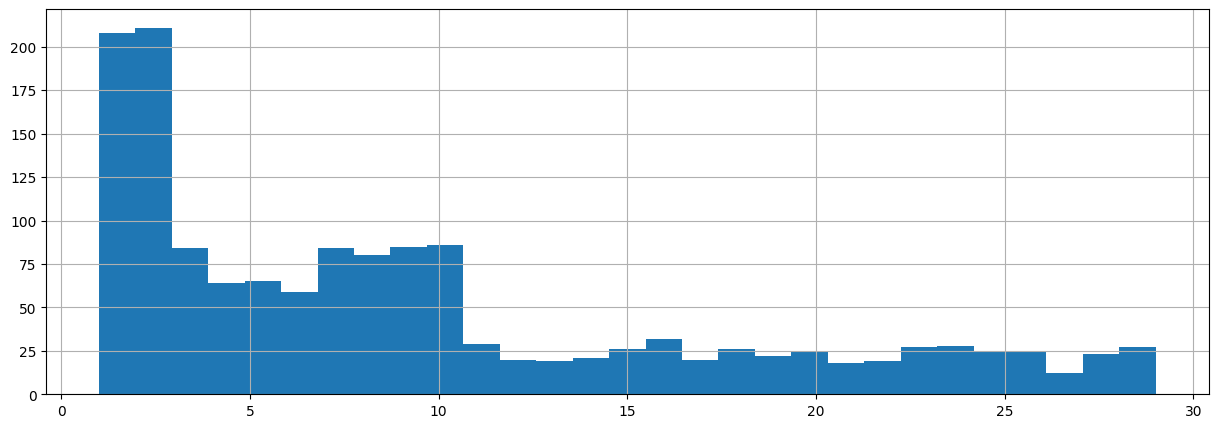

In [19]:
data['DistanceFromHome'].hist(bins = 29,orientation = 'vertical',figsize = (15,5))

In [20]:
data['DistanceFromHome'].value_counts().to_frame()

,count
DistanceFromHome,
2,211
1,208
10,86
9,85
3,84
7,84
8,80
5,65
4,64


In [21]:
data['TrainingTimesLastYear'].value_counts().to_frame()

,count
TrainingTimesLastYear,
2,547
3,491
4,123
5,119
1,71
6,65
0,54


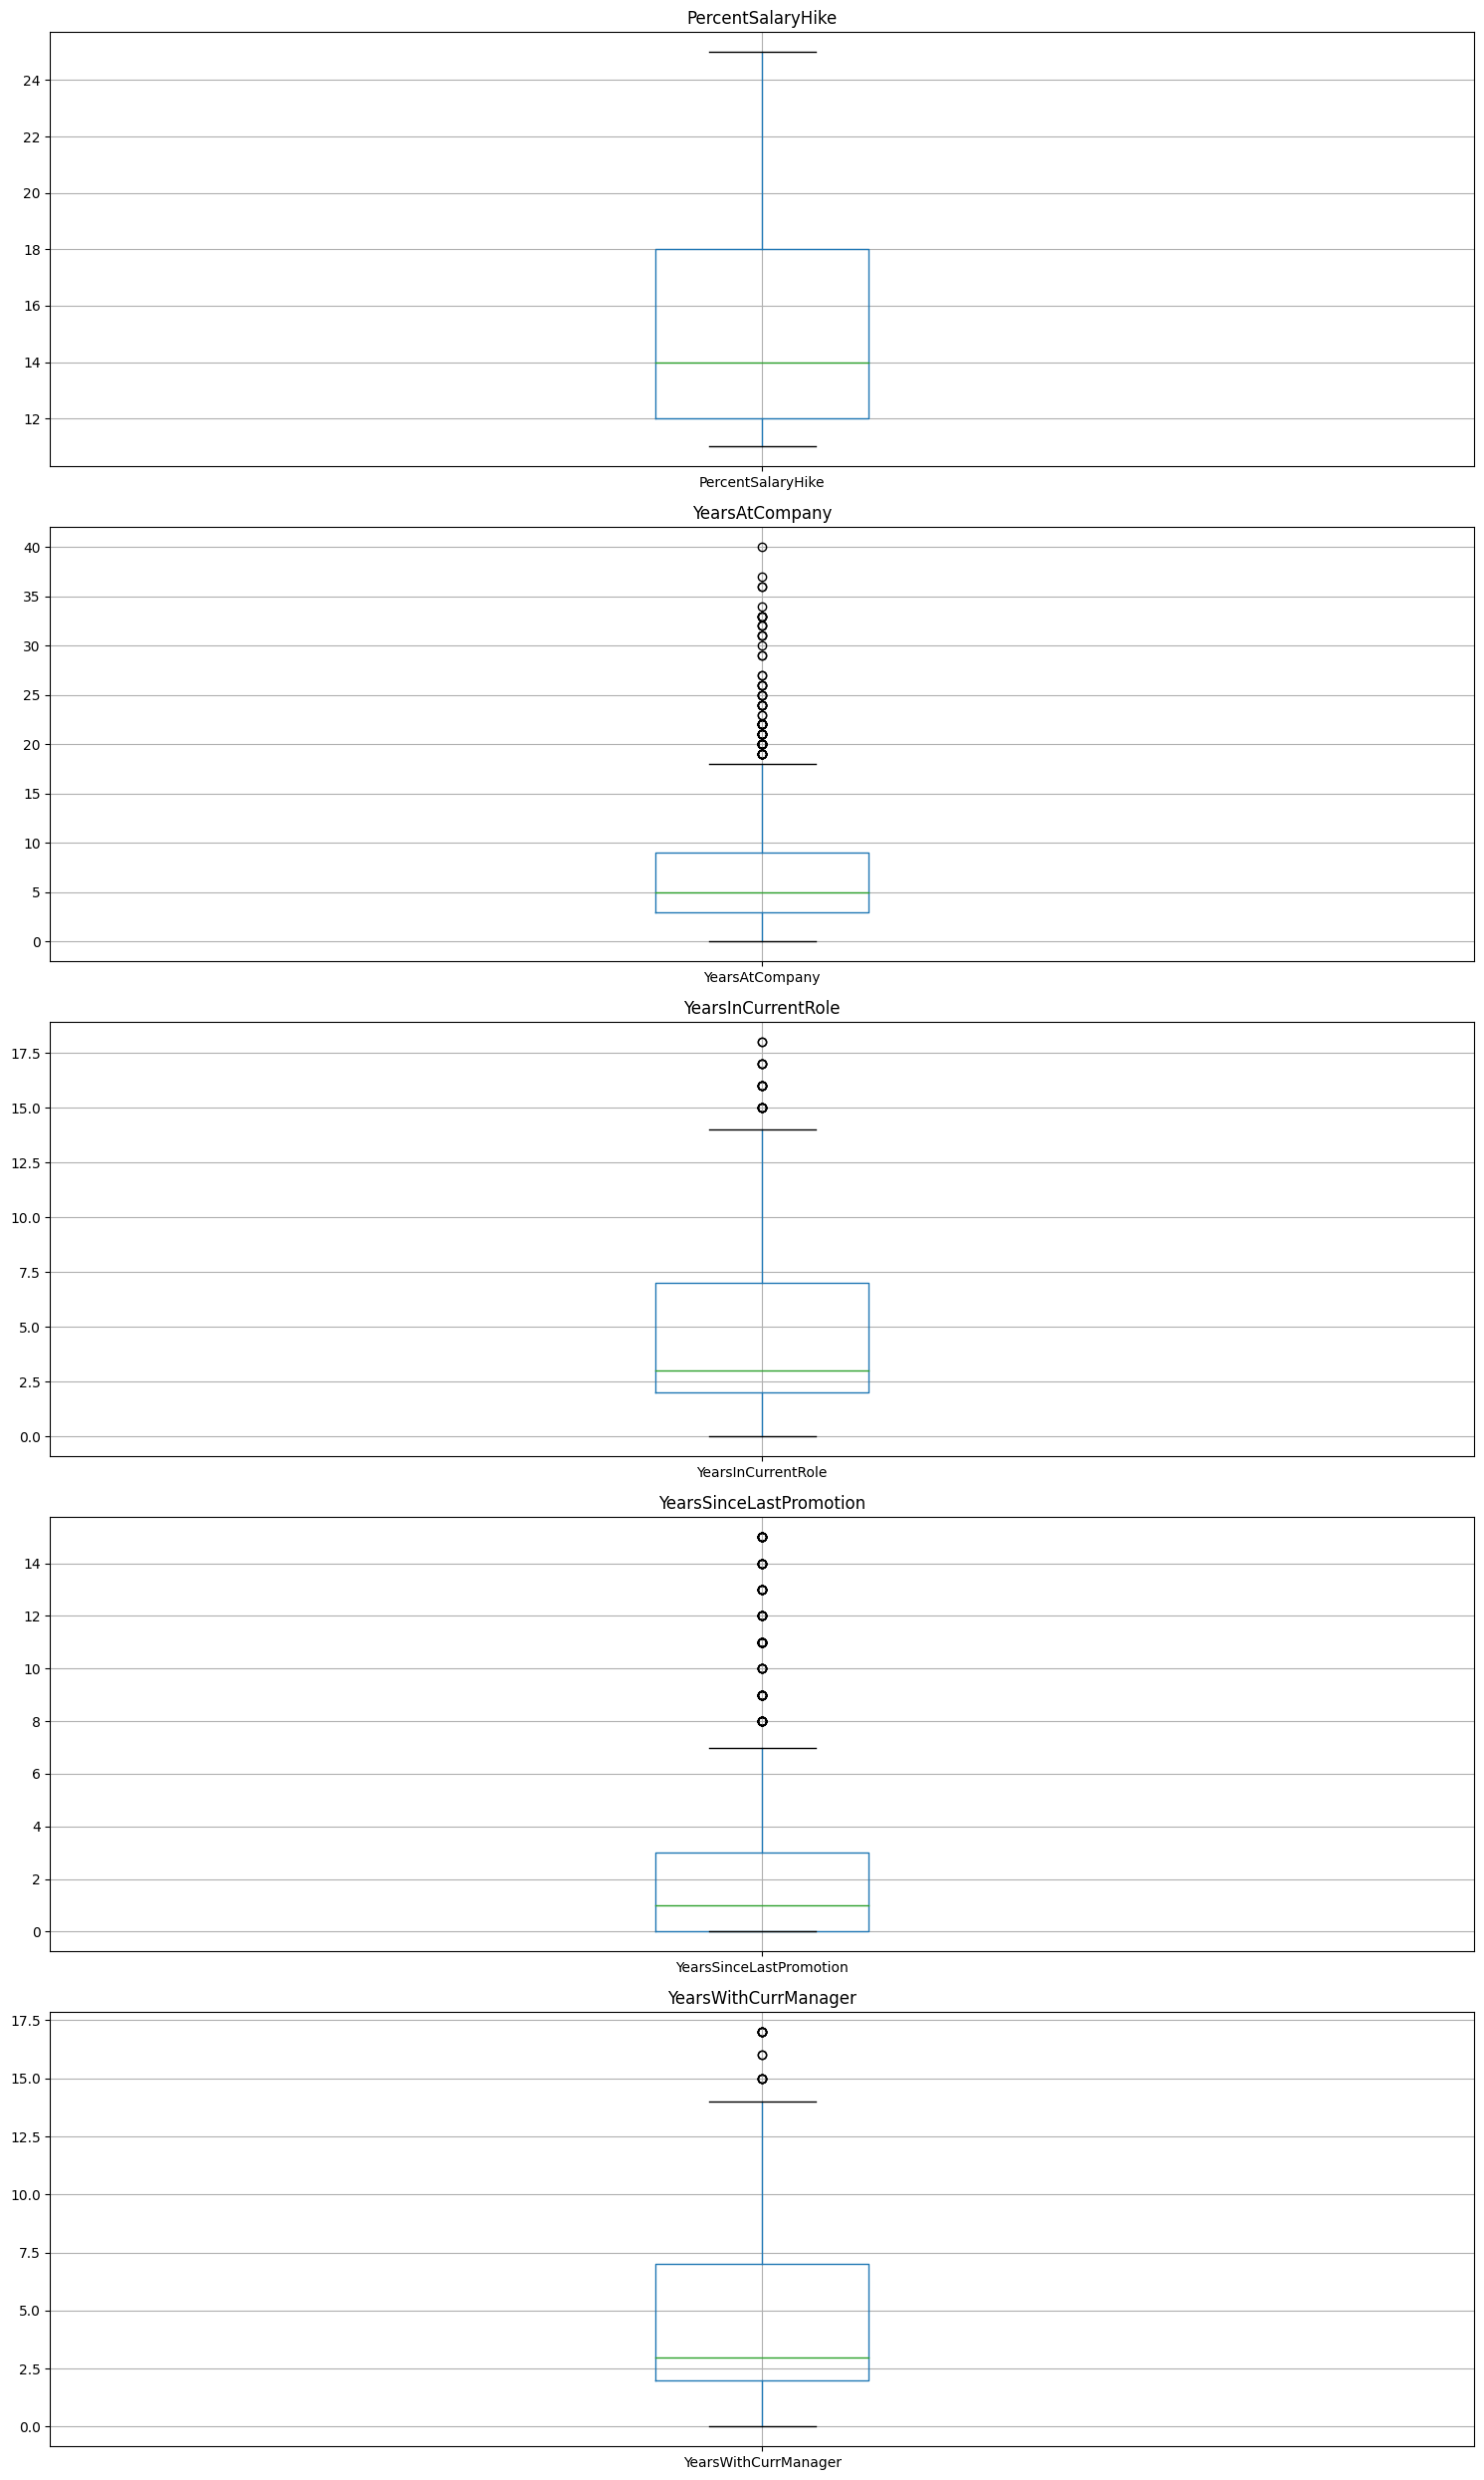

In [22]:
import matplotlib.pyplot as plt

# Sample DataFrame
# Assuming 'data' is your DataFrame

test_columns = ['PercentSalaryHike','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']

# Create subplots
fig, axes = plt.subplots(len(test_columns), 1, figsize=(15, 5 * len(test_columns)))

# Plot boxplots for each column
for i, col in enumerate(test_columns):
    data.boxplot(column=col, ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()


In [23]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Iterate over categorical columns and encode them one by one
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])


In [24]:
for col in data.columns:
    data[col] = data[col].astype('int32')

In [25]:
data

,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,TotalYearsCategory,AgeCategory
0,1,2,2,1,2,1,2,0,94,3,...,1,0,0,1,6,4,0,5,2,1
1,0,1,1,8,1,1,3,1,61,2,...,4,1,3,3,10,7,1,7,2,3
2,1,2,1,2,2,4,4,1,92,2,...,2,0,3,3,0,0,0,0,2,2
3,0,1,1,3,4,1,4,0,56,3,...,3,0,3,3,8,7,3,0,2,2
4,0,2,1,2,1,3,1,1,40,3,...,4,1,3,3,2,2,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,1,1,23,2,3,3,1,41,4,...,3,1,3,3,5,2,0,3,6,2
1466,0,2,1,6,1,3,4,1,42,2,...,1,1,5,3,7,7,1,7,2,2
1467,0,2,1,4,3,1,2,1,87,4,...,2,1,0,3,6,2,0,3,2,0
1468,0,1,2,2,3,3,4,1,63,2,...,4,0,3,2,9,6,0,8,6,3


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Attrition                 1470 non-null   int32
 1   BusinessTravel            1470 non-null   int32
 2   Department                1470 non-null   int32
 3   DistanceFromHome          1470 non-null   int32
 4   Education                 1470 non-null   int32
 5   EducationField            1470 non-null   int32
 6   EnvironmentSatisfaction   1470 non-null   int32
 7   Gender                    1470 non-null   int32
 8   HourlyRate                1470 non-null   int32
 9   JobInvolvement            1470 non-null   int32
 10  JobLevel                  1470 non-null   int32
 11  JobRole                   1470 non-null   int32
 12  JobSatisfaction           1470 non-null   int32
 13  MaritalStatus             1470 non-null   int32
 14  NumCompaniesWorked        1470 non-null 

In [27]:
y = data['Attrition'].copy()
data.drop(['Attrition'], axis = 1,inplace = True)

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(data)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17,stratify=y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1176, 27)
(294, 27)
(1176,)
(294,)


In [30]:
#Method to evaluate the performance of the model
def evaluate_model(y_test,y_pred):
    print("Classification Report")
    print(classification_report(y_test, y_pred))

    print("\n---------------------------------------------\n")
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Create a heatmap of the confusion matrix using Seaborn
    sns.heatmap(cm, annot=True, cmap='Greens',fmt='.0f')

    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')

    plt.show()

# List of classifiers to test
classifiers = [
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier(n_estimators = 500)),
    ('KNN', KNeighborsClassifier(n_neighbors=5)),
    ('Gaussion NB',GaussianNB()),
    ('XGB',xgb.XGBClassifier())
]

# Iterate over each classifier and evaluate performance
for clf_name, clf in classifiers:
    # Perform cross-validation
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')

    # Calculate average performance metrics
    avg_accuracy = scores.mean()
    avg_precision = cross_val_score(clf, X_train, y_train, cv=5, scoring='precision_macro').mean()
    avg_recall = cross_val_score(clf, X_train, y_train, cv=5, scoring='recall_macro').mean()

    # Print the performance metrics
    print(f'Classifier: {clf_name}')
    print(f'Average Accuracy: {avg_accuracy:.4f}')
    print(f'Average Precision: {avg_precision:.4f}')
    print(f'Average Recall: {avg_recall:.4f}')
    print('-----------------------')


Classifier: Decision Tree
Average Accuracy: 0.7900
Average Precision: 0.6310
Average Recall: 0.6350
-----------------------
Classifier: Random Forest
Average Accuracy: 0.8546
Average Precision: 0.8035
Average Recall: 0.5728
-----------------------
Classifier: KNN
Average Accuracy: 0.8469
Average Precision: 0.7402
Average Recall: 0.5624
-----------------------
Classifier: Gaussion NB
Average Accuracy: 0.8206
Average Precision: 0.6791
Average Recall: 0.6954
-----------------------
Classifier: XGB
Average Accuracy: 0.8555
Average Precision: 0.7402
Average Recall: 0.6440
-----------------------


Classification Report
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       247
           1       0.59      0.36      0.45        47

    accuracy                           0.86       294
   macro avg       0.74      0.66      0.68       294
weighted avg       0.84      0.86      0.84       294


---------------------------------------------



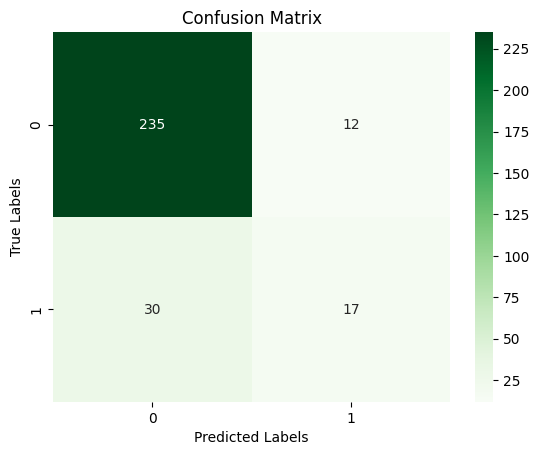

In [31]:
from xgboost import XGBClassifier

# Initialize the classifier
model = XGBClassifier()

# Train the classifier
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

evaluate_model(y_test, y_pred)